# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
import os
path = "/content/drive/MyDrive/23_2학기/데이터마이닝/teamproject"
os.listdir(path)

['data.csv',
 'EDA_thyroidDF.ipynb',
 'others',
 'Untitled.ipynb',
 'eda_preprocessing.ipynb',
 'DM_share',
 'original.csv',
 'original_modeling.ipynb',
 'log_k2.csv']

In [ ]:
df = pd.read_csv(path + '/data.csv')

# EDA 및 전처리

In [ ]:
df[(df['sex'].isnull()) & (df['pregnant'] == 't')]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
169,18,NaN,f,f,f,f,t,f,f,f,f,f,f,f,f,f,t,11.599999,t,2.0,t,87.0,t,0.32,t,272.0,f,NaN,other,R,840827025
4380,21,NaN,f,f,f,f,t,f,f,f,f,f,f,t,f,f,t,2.400000,t,3.5,t,171.0,t,1.49,t,115.0,f,NaN,STMW,C|I,850918018
4829,73,NaN,f,f,f,f,t,f,f,f,f,f,f,f,f,f,t,2.200000,t,2.5,t,110.0,t,1.28,t,85.0,f,NaN,other,-,851024089
6526,33,NaN,f,f,f,f,t,f,f,f,f,f,f,f,f,f,t,0.620000,f,NaN,t,132.0,t,1.87,t,71.0,f,NaN,STMW,I,860414002


In [ ]:
df[(df['pregnant'] == 't')]['sex'].unique()

array([nan, 'F'], dtype=object)

In [ ]:
df['target'].nunique()

32

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
df.shape

(9172, 31)

In [ ]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


In [ ]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
# Id는 불필요
df = df.drop('patient_id', axis=1)

In [ ]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target'],
      dtype='object')

In [ ]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
df['target'].value_counts()

-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64

## 나이 처리

In [ ]:
# 나이 이상값
df['age'].unique()

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    75,    56,    85,
          71,    67,    55,    61,    46,    44,    82,    64,    70,
          33,    59,    53,    52,    49,    35,    48,    27,    69,
          76,    73,    68,    66,    30,    88,    38,    58,    21,
          45,    83,    62,    25,    86,    72,    14,    15,    39,
          26,    20,    80,    90,    23,    18,    13,    78,    24,
          81,    92,    57,    74,     9,    47,    17,    11,    50,
          34,     8,    79,    31,    65,    84,    12,    10,    19,
          22,     1,     2,    97,     6,    89,    87,   455,    93,
           7,    91,     5,    94,     4, 65511,    95, 65512,     3,
       65526])

In [ ]:
# 나이 이상값 처리
df = df[df['age'] < 150]

## hypopituitary

In [ ]:
# 당장은 t가 2개 존재하긴 하지만 target에 따라 row drop 후 f만 존재하면 drop ㄱㄱ
df['hypopituitary'].value_counts()

f    9166
t       2
Name: hypopituitary, dtype: int64

## _meausured columns

In [ ]:
# 각 컬럼에서 'f'인 값의 수 세기
tsh_f_count = (df['TSH_measured'] == 'f').sum()
t3_f_count = (df['T3_measured'] == 'f').sum()
tt4_f_count = (df['TT4_measured'] == 'f').sum()
t4u_f_count = (df['T4U_measured'] == 'f').sum()
fti_f_count = (df['FTI_measured'] == 'f').sum()
tbg_f_count = (df['TBG_measured'] == 'f').sum()

# 결과 출력
print(f"TSH_measured 'f' count: {tsh_f_count}")
print(f"T3_measured 'f' count: {t3_f_count}")
print(f"TT4_measured 'f' count: {tt4_f_count}")
print(f"T4U_measured 'f' count: {t4u_f_count}")
print(f"FTI_measured 'f' count: {fti_f_count}")
print(f"TBG_measured 'f' count: {tbg_f_count}")

TSH_measured 'f' count: 842
T3_measured 'f' count: 2603
TT4_measured 'f' count: 442
T4U_measured 'f' count: 809
FTI_measured 'f' count: 802
TBG_measured 'f' count: 8819


In [ ]:
measured_list = ['TSH', 'T3', 'TT4',  'T4U','FTI', 'TBG']

In [ ]:
df[measured_list].isnull().sum() # 각 measured가 f인 수와 null값 수가 같다.

TSH     842
T3     2603
TT4     442
T4U     809
FTI     802
TBG    8819
dtype: int64

In [ ]:
# 중복 컬럼이므로 제거
df = df.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'], axis=1)

## referral_source

In [ ]:
# 정확히 무슨 컬럼인지 파악못함. 일단은 두자
df['referral_source'].value_counts()

other    5490
SVI      2393
SVHC      956
STMW      255
SVHD       71
WEST        3
Name: referral_source, dtype: int64

## null값 파악

TBG는 drop이 맞다

In [ ]:
# calculating missingess of entire DF
missingness = df.isnull().sum().sum() / df.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

# Create table for missing data analysis
def missing_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Analyze missing data
missing_table(df).head(10)

Overall Missingness of thyroidDF is: 7.12%


,Total,Percent
TBG,8819,0.961933
T3,2603,0.283922
TSH,842,0.091841
T4U,809,0.088242
FTI,802,0.087478
TT4,442,0.048211
sex,307,0.033486
age,0,0.000000
referral_source,0,0.000000
psych,0,0.000000


In [ ]:
df = df.drop('TBG', axis=1)

## 수치형 컬럼 히스토그램

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # 수치형 컬럼
tf_columns = df.select_dtypes(include=['object']).columns.tolist() # 범주형 컬럼

In [ ]:
tf_columns.remove('target')

_measured 컬럼들은 대체로 양의 왜도 심하여 로그화 필요

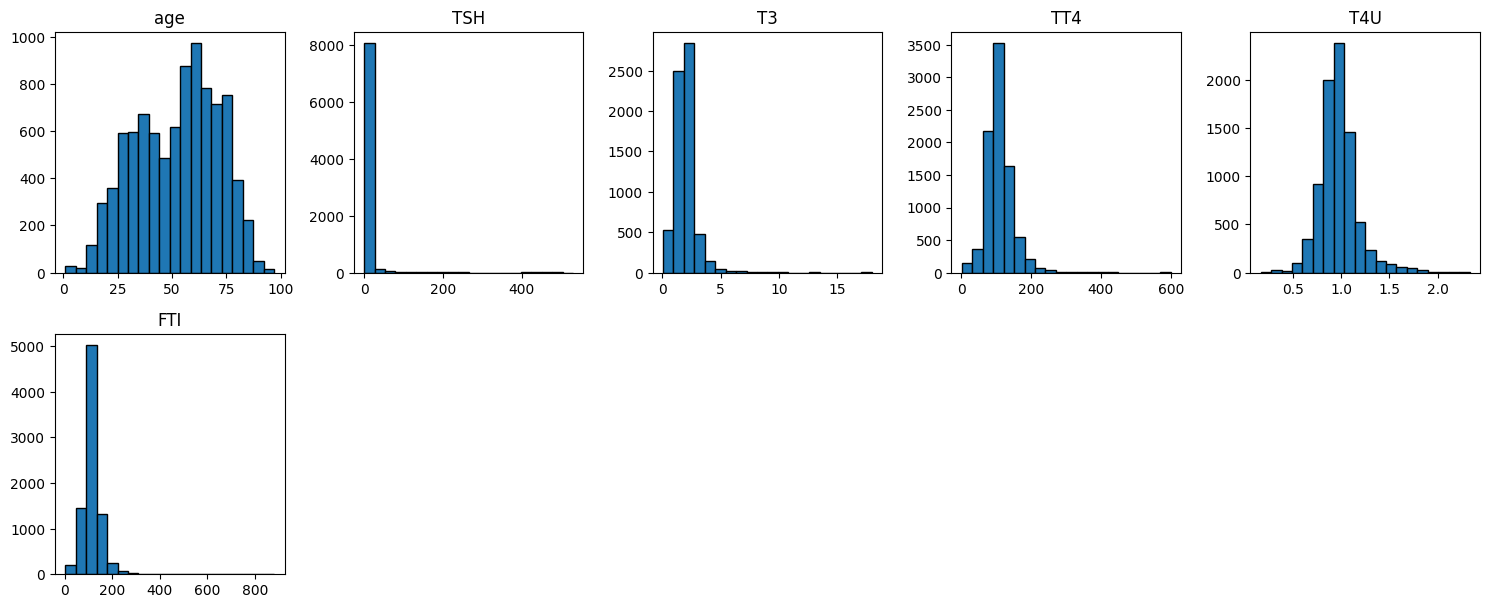

In [ ]:
# 히스토그램을 그릴 서브플롯 생성
plt.figure(figsize=(15, 15))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(5, 5, i)
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.title(column)
    plt.tight_layout()

plt.show()

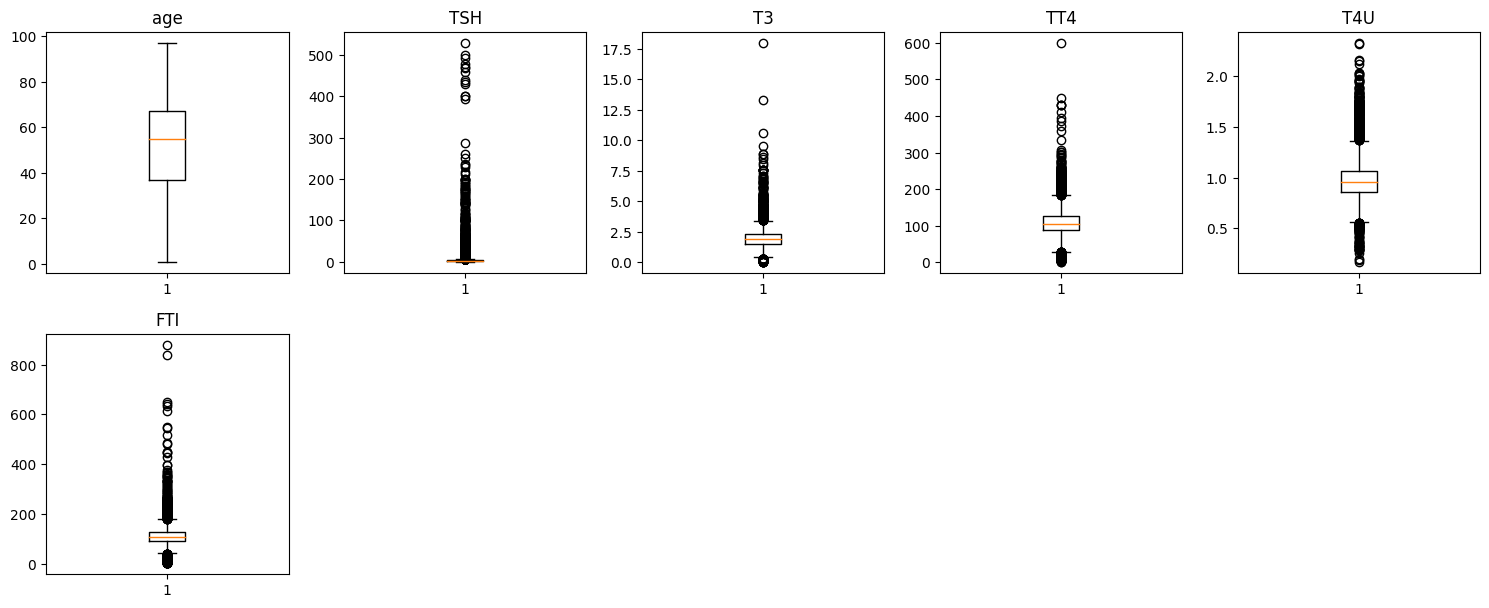

In [ ]:
# 히스토그램을 그릴 서브플롯 생성
plt.figure(figsize=(15, 15))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(5, 5, i)
    plt.boxplot(df[column].dropna())
    plt.title(column)
    plt.tight_layout()

plt.show()

## 범주형 컬럼 barplot

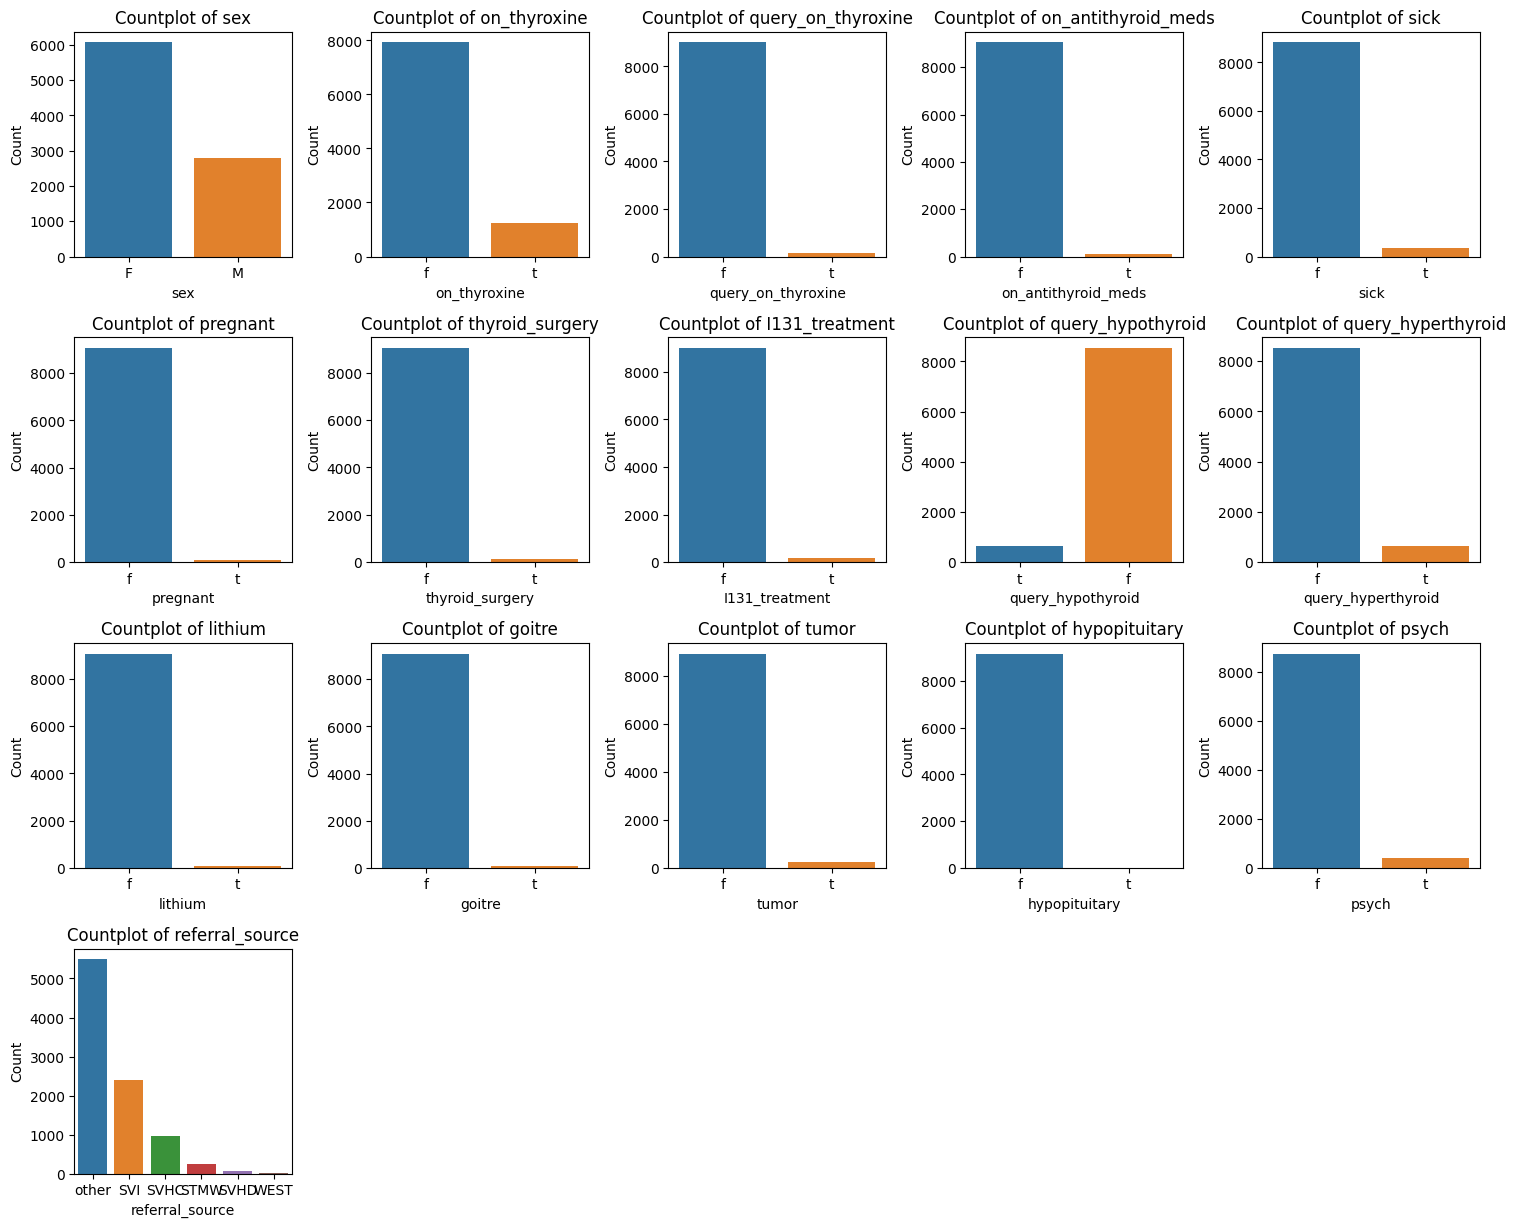

In [ ]:
# 바 플롯 그릴 서브플롯 생성
plt.figure(figsize=(15, 15))
for i, column in enumerate(tf_columns, start=1):
    plt.subplot(5, 5, i)  # Adjust the subplot grid as needed
    sns.countplot(x=column, data=df)
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## target : 단순 binary target

### 수치형 컬럼(이산, 연속)

In [ ]:
df_bn = df.copy()

In [ ]:
# 'target' 컬럼 값 매핑
df_bn['target'] = df_bn['target'].map(lambda x: 0 if x == '-' else 1)

<Axes: >

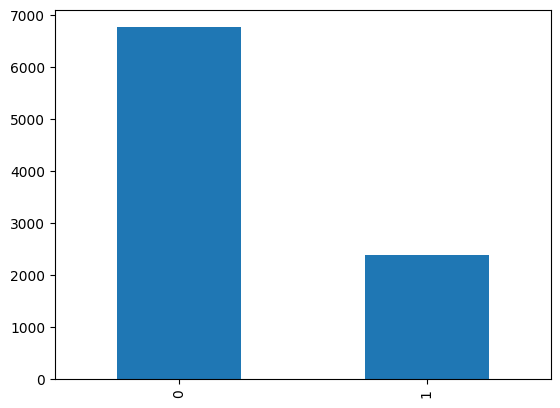

In [ ]:
df_bn['target'].value_counts().plot(kind='bar')

TSH, T3, TT4, T4U, FTI는 값이 너무 크거나 작으면 target 1인 경우가 많고,
TBG는 클 때 target 1인 경우가 많음. 하지만 null값 너무 많아서 드랍 될 예정

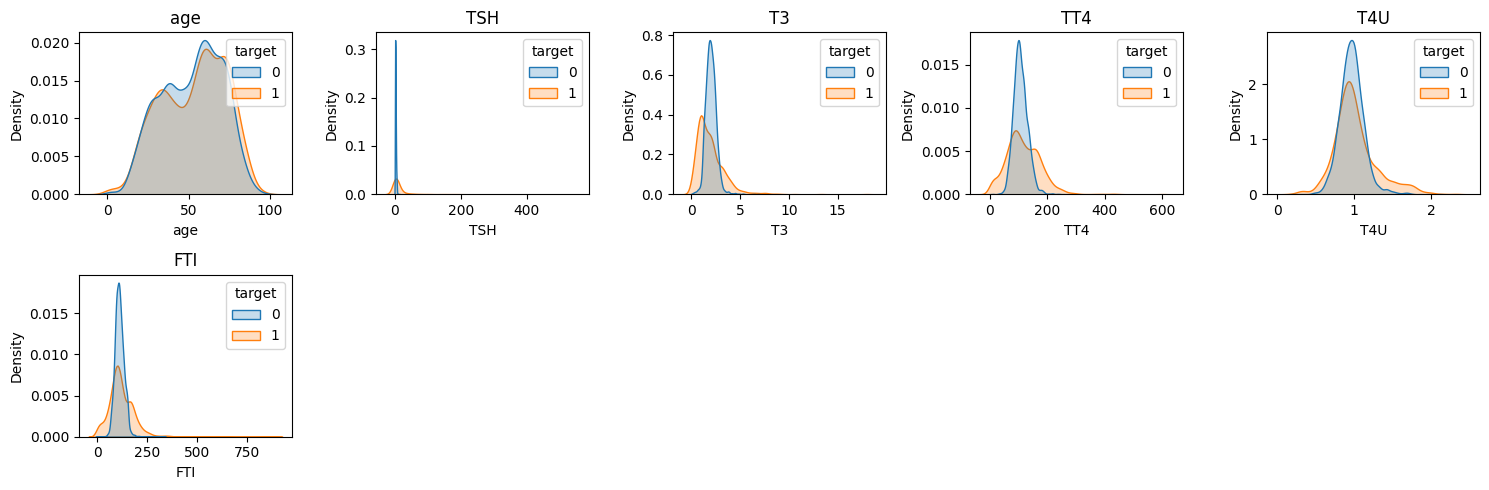

In [ ]:
# target에 따른 히스토그램
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(2, 5, i)
    sns.kdeplot(data=df_bn, x=column, hue='target', fill=True, common_norm=False)
    plt.title(column)
    plt.tight_layout()

plt.show()

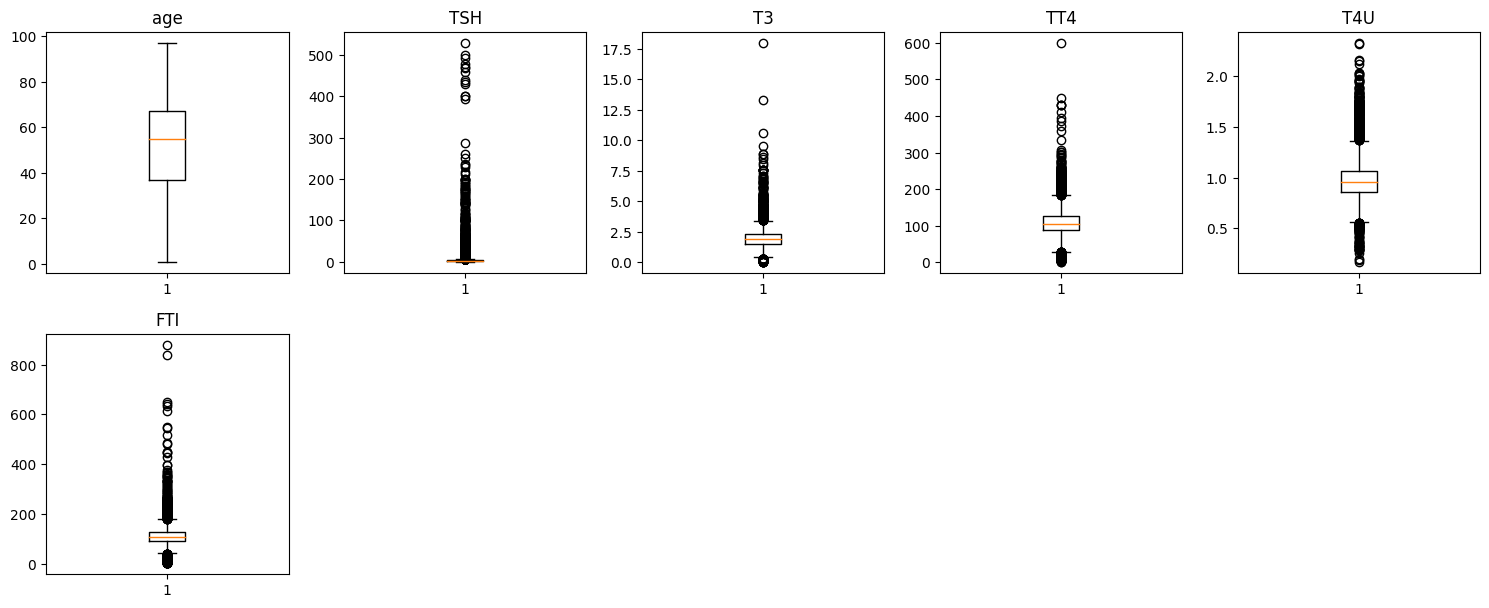

In [ ]:
# 히스토그램을 그릴 서브플롯 생성
plt.figure(figsize=(15, 15))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(5, 5, i)
    plt.boxplot(df_bn[column].dropna())
    plt.title(column)
    plt.tight_layout()

plt.show()

In [ ]:
numerical_df = df_bn[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()

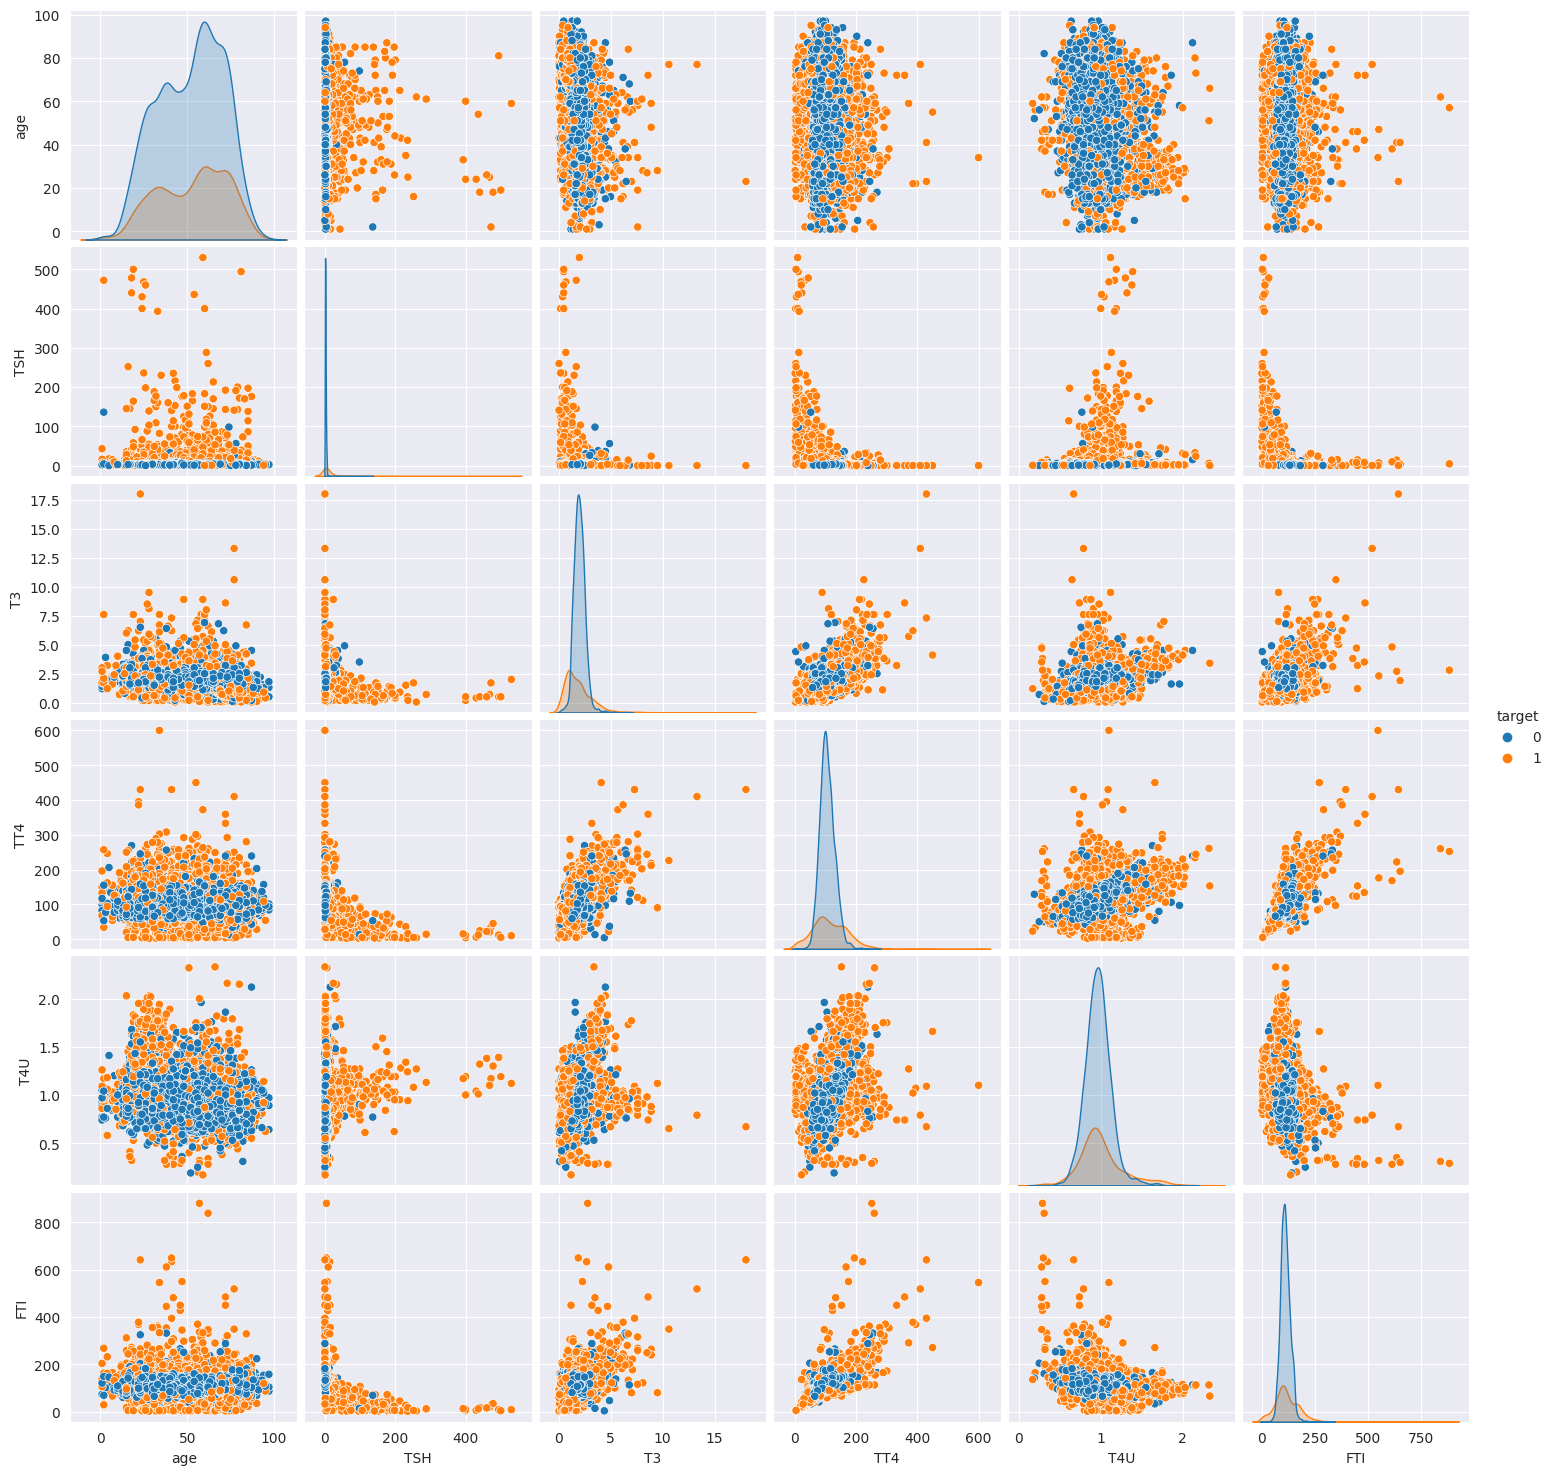

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(numerical_df, hue='target')
plt.show()

### 범주형 컬럼

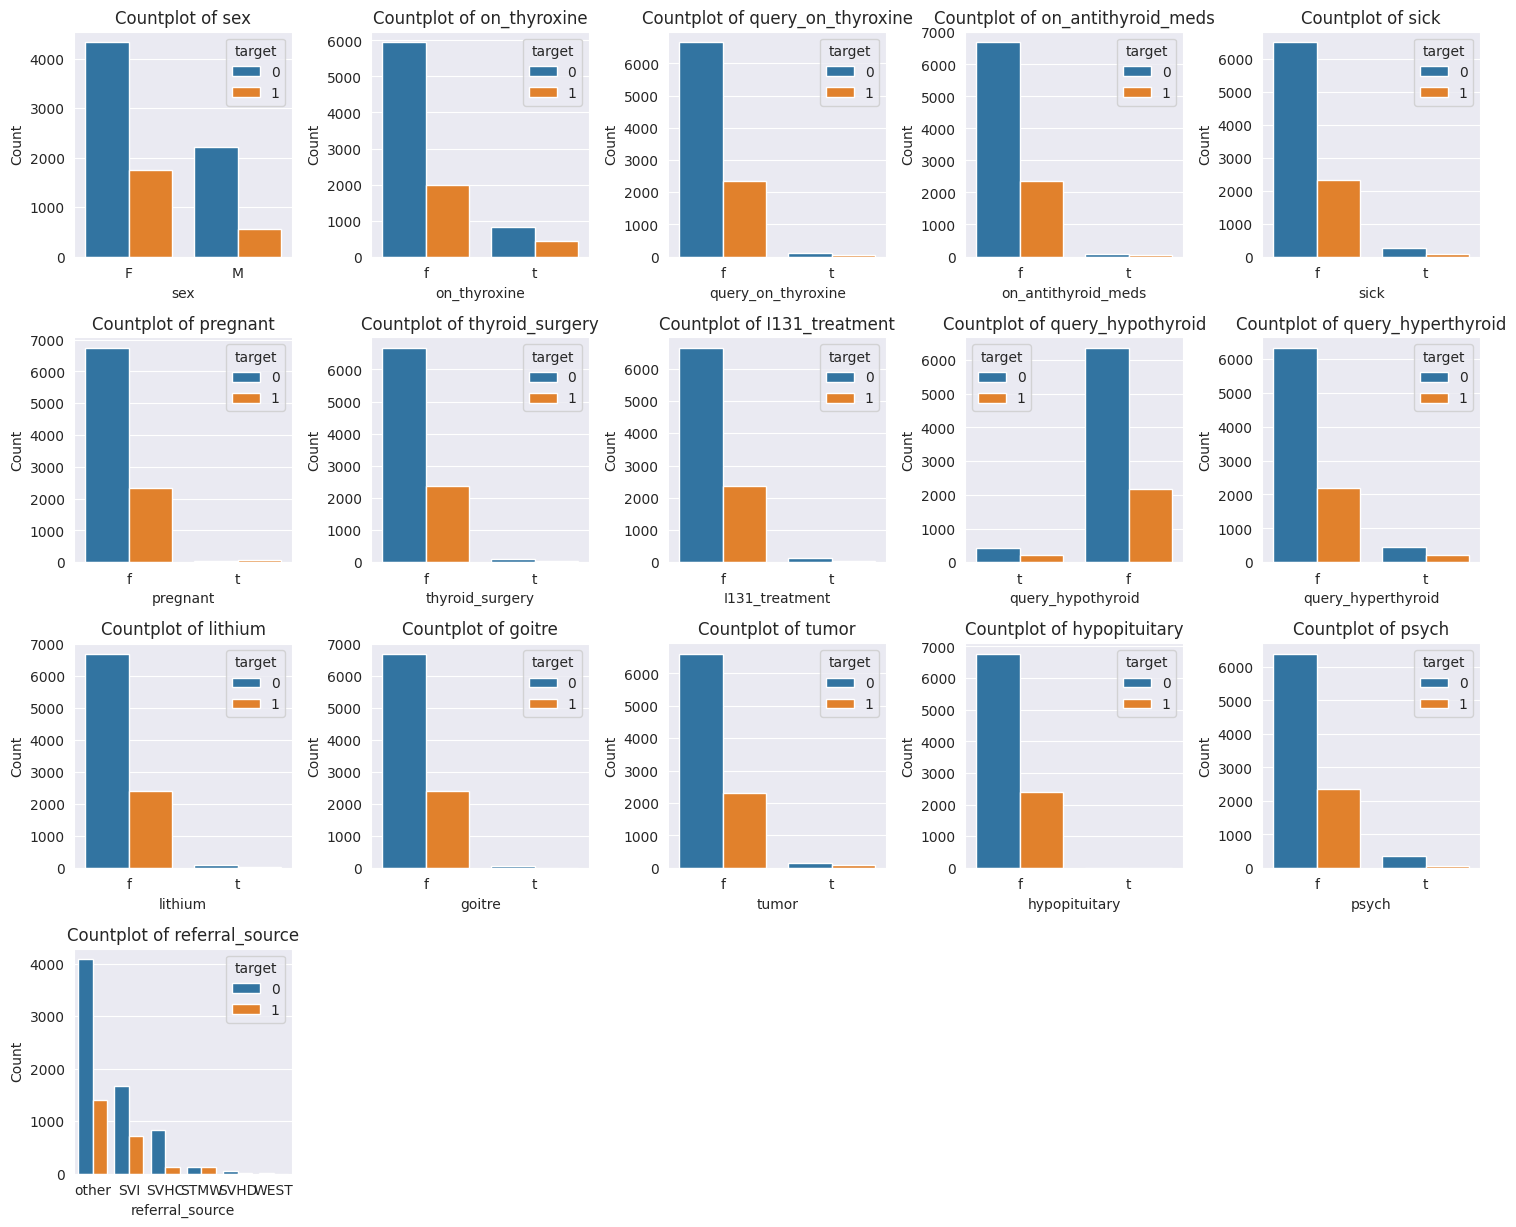

In [ ]:
# 바 플롯 그릴 서브플롯 생성
plt.figure(figsize=(15, 15))
for i, column in enumerate(tf_columns, start=1):
    plt.subplot(5, 5, i)  # Adjust the subplot grid as needed
    sns.countplot(x=column, data=df_bn, hue='target')
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 히트맵

target과 TBG가 나름 선형관계성 띰

<ipython-input-49-9dc467e92e4e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_bn.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


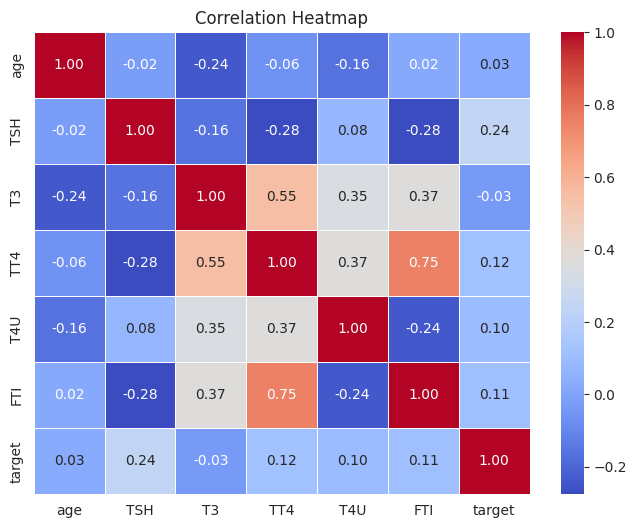

In [ ]:
# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(df_bn.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

## target : negative, hyperthyroid, hypothyroid(0, 1, 2)

### 수치형 컬럼(이산, 연속)

In [ ]:
df_three = df.copy()

In [ ]:
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid',
             'AK': 'hyperthyroid',
             'B': 'hyperthyroid',
             'C': 'hyperthyroid',
             'C|I': 'hyperthyroid',
             'D': 'hyperthyroid',
             'D|R': 'hyperthyroid',
             'E': 'hypothyroid',
             'F': 'hypothyroid',
             'FK': 'hypothyroid',
             'G': 'hypothyroid',
             'GK': 'hypothyroid',
             'GI': 'hypothyroid',
             'GKJ': 'hypothyroid',
             'H': 'hypothyroid',
             'H|K': 'hypothyroid'
             }

df_three['target'] = df_three['target'].map(diagnoses)

In [ ]:
df_three['target'].value_counts(dropna=False)

negative        6767
NaN             1493
hypothyroid      667
hyperthyroid     241
Name: target, dtype: int64

In [ ]:
# 셋 외 null값은 drop
df_three.dropna(subset=['target'], inplace=True)
df_three['target'].value_counts(dropna=False)

negative        6767
hypothyroid      667
hyperthyroid     241
Name: target, dtype: int64

In [ ]:
# 매핑 딕셔너리 생성
target_mapping = {'negative': 0, 'hyperthyroid': 1, 'hypothyroid': 2}

# 'target' 열 매핑
df_three['target'] = df_three['target'].map(target_mapping)

negative(0), hyperthyroid(1), hypothyroid(2)

<Axes: >

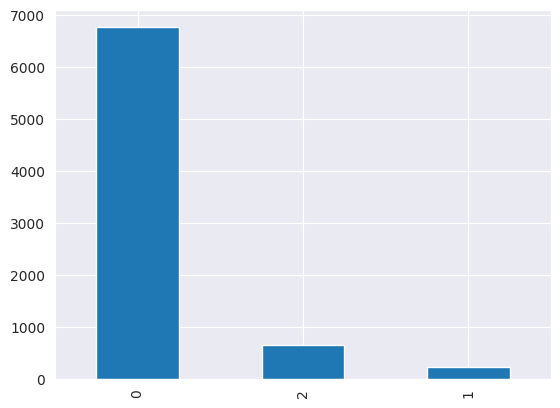

In [ ]:
df_three['target'].value_counts().plot(kind='bar')

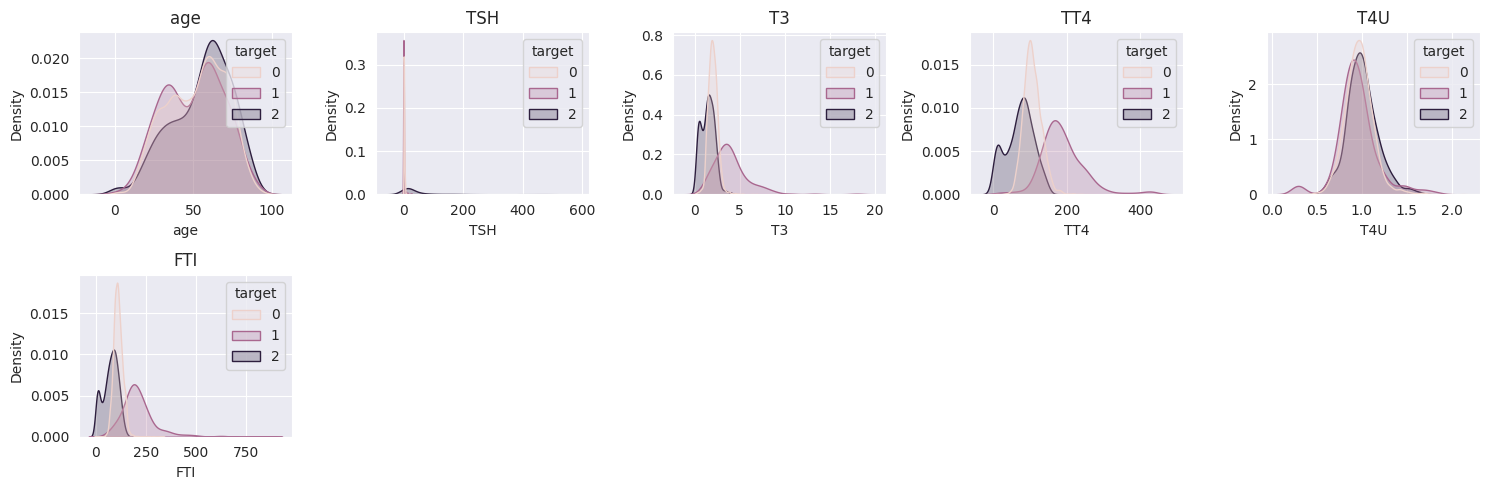

In [ ]:
# target에 따른 히스토그램
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(2, 5, i)
    sns.kdeplot(data=df_three, x=column, hue='target', fill=True, common_norm=False)
    plt.title(column)
    plt.tight_layout()

plt.show()

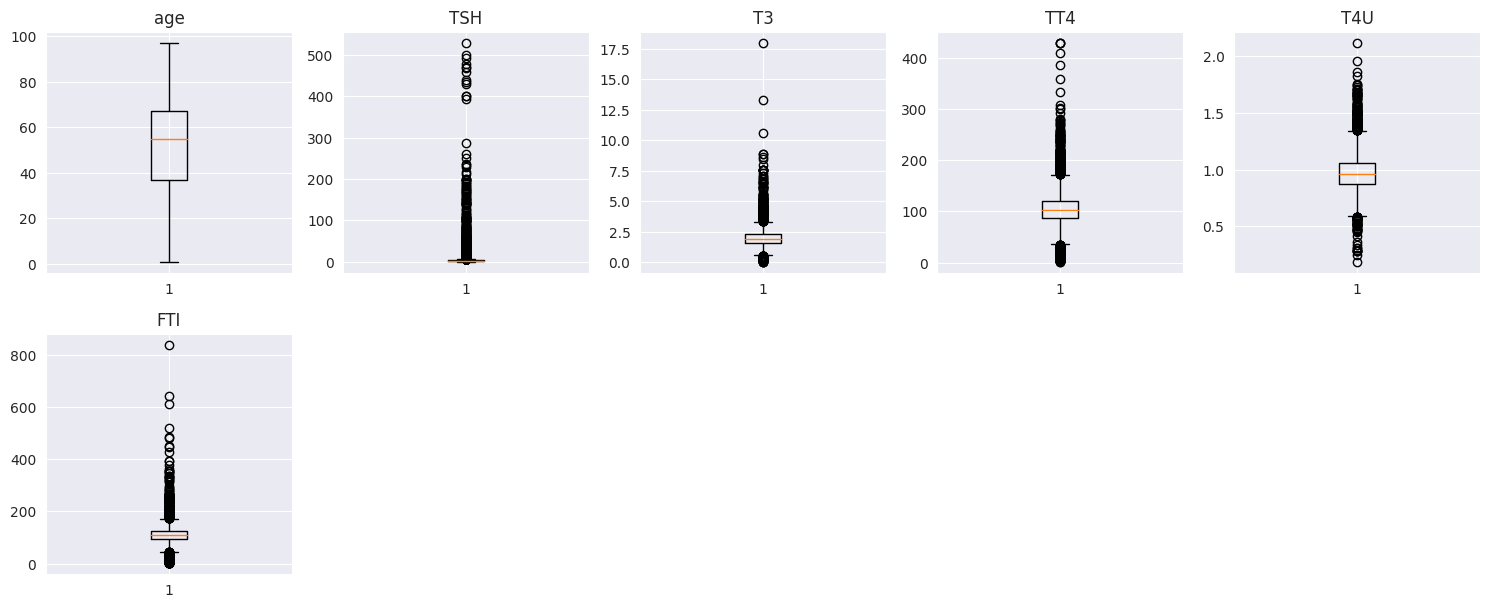

In [ ]:
# 히스토그램을 그릴 서브플롯 생성
plt.figure(figsize=(15, 15))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(5, 5, i)
    plt.boxplot(df_three[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
numerical_df_three = df_three[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()

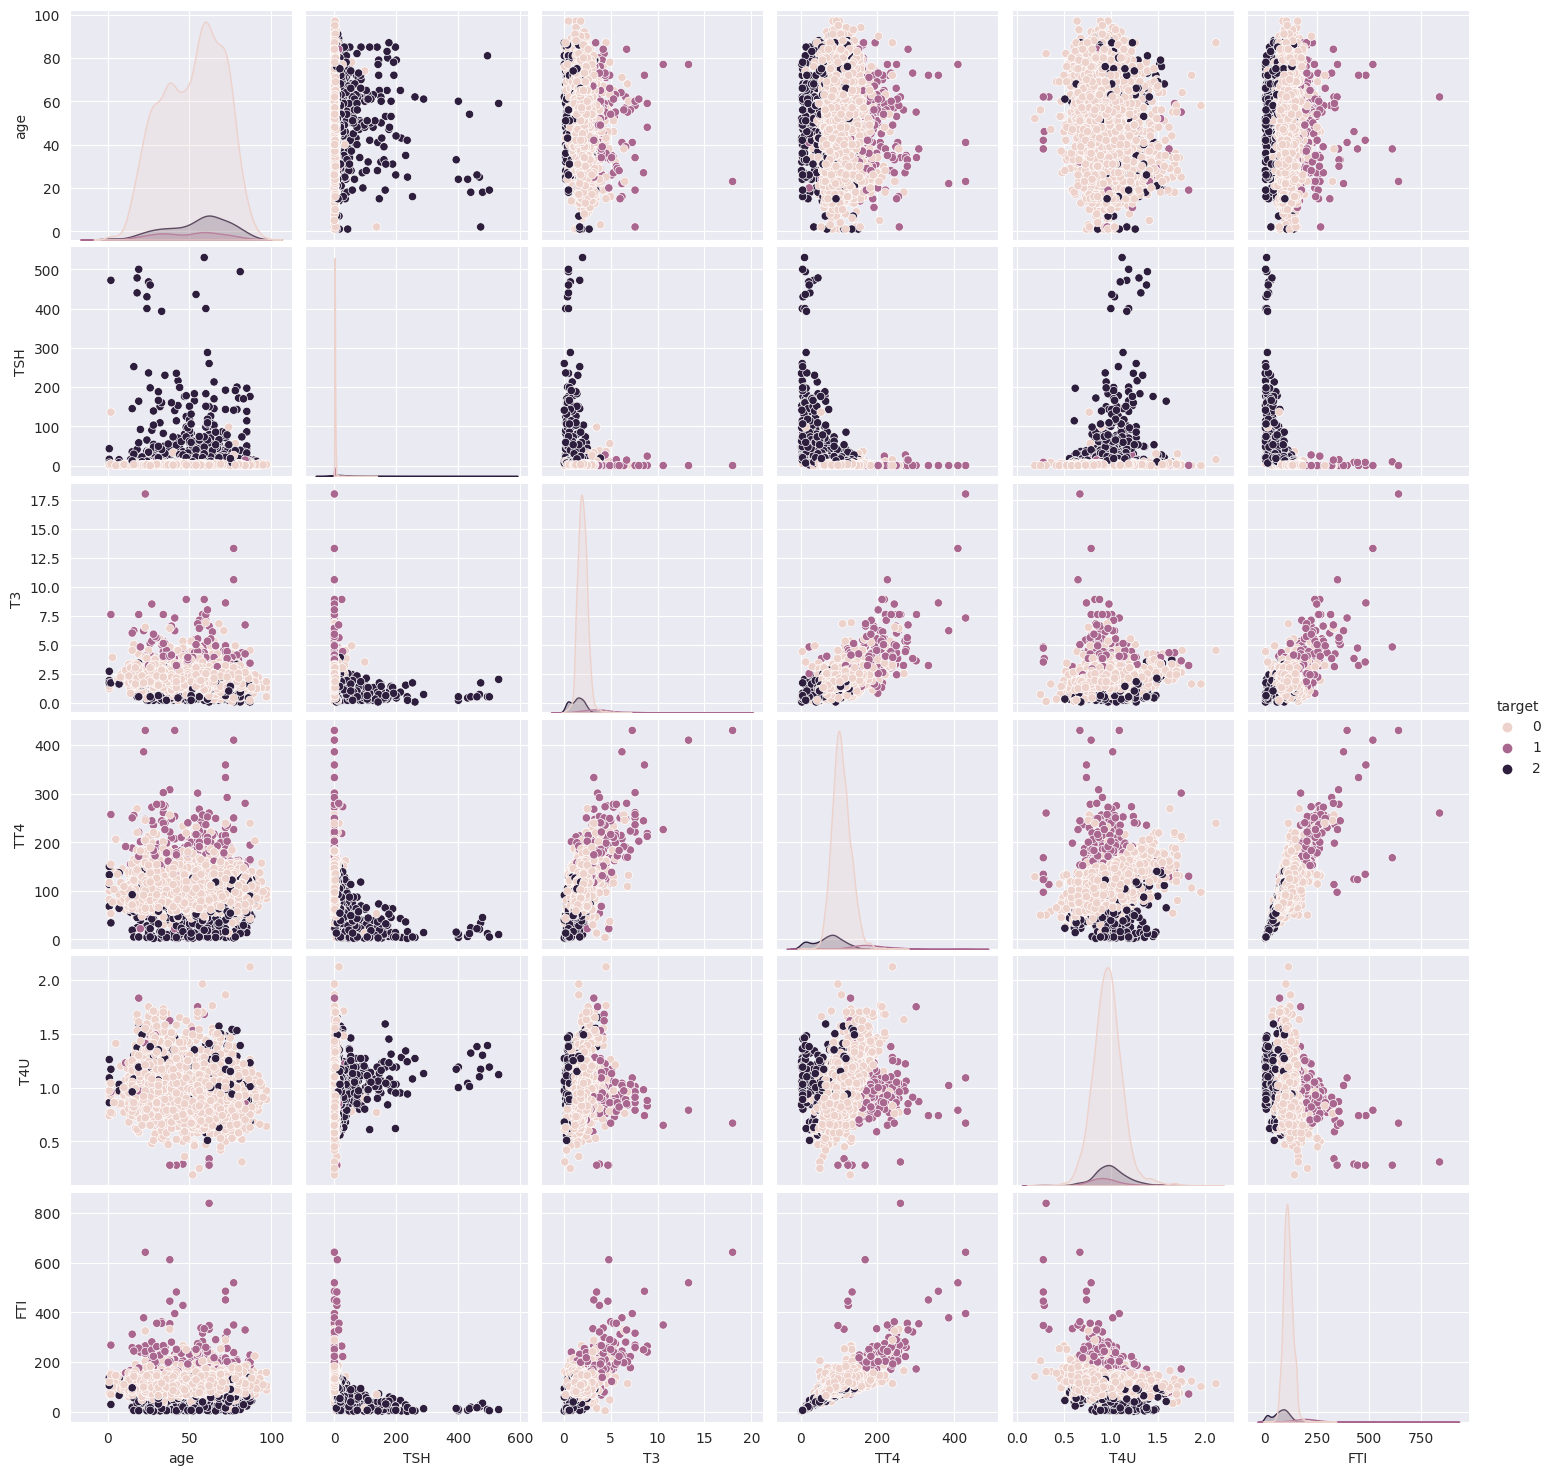

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(numerical_df_three, hue='target')
plt.show()

### 범주형 컬럼

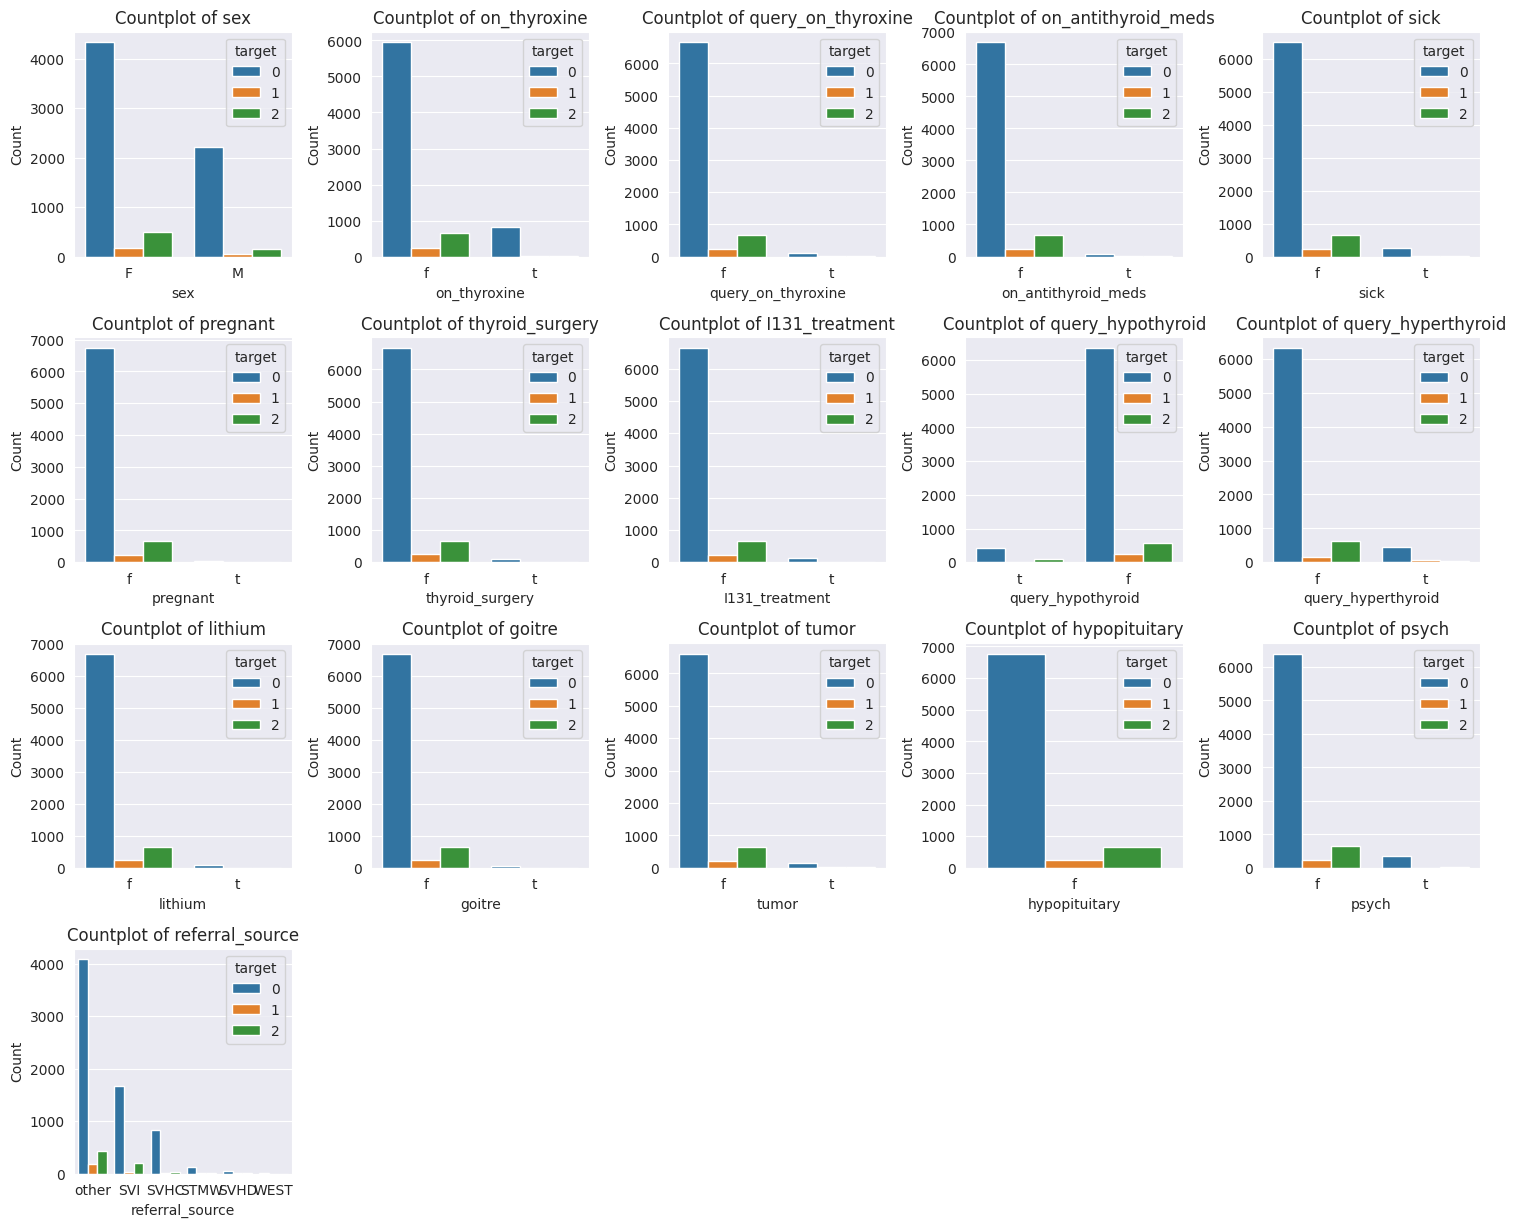

In [ ]:
# 바 플롯 그릴 서브플롯 생성
plt.figure(figsize=(15, 15))
for i, column in enumerate(tf_columns, start=1):
    plt.subplot(5, 5, i)  # Adjust the subplot grid as needed
    sns.countplot(x=column, data=df_three, hue='target')
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 히트맵

target과 TSH가 나름 선형관계성 띰

<ipython-input-61-35140fa943a3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_three.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


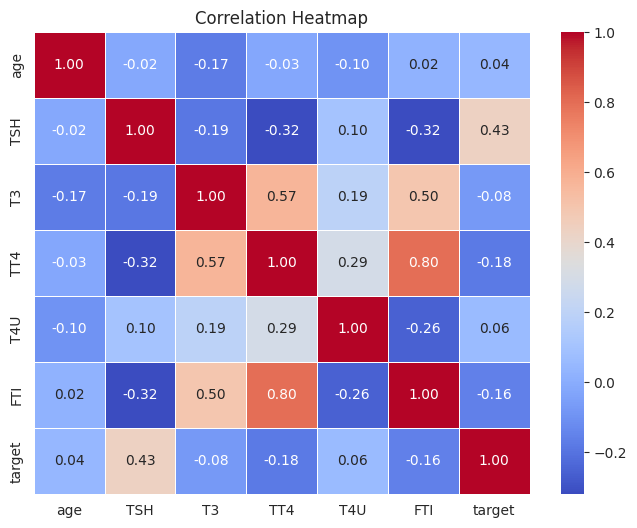

In [ ]:
# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(df_three.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_three, x='T4U', y='T3', z='TSH',color='target', color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'}, height=800)
fig.show()

# class 3개로 나눈 후..

## referral 드랍

In [ ]:
df_preprocessing = df_three.copy()

In [ ]:
# 이진 분류로 변경
df_preprocessing['target'] = df_preprocessing['target'].replace(2, 1)

In [ ]:
df_preprocessing['target'].value_counts()

0    6767
1     908
Name: target, dtype: int64

In [ ]:
df_preprocessing = df_preprocessing.drop('referral_source', axis=1)

## hypopituitary cardinality 1이므로 drop

In [ ]:
df_preprocessing = df_preprocessing.drop('hypopituitary', axis=1)

## 남은 결측치 해결

In [ ]:
df_preprocessing.isnull().sum()

age                       0
sex                     254
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
psych                     0
TSH                     724
T3                     2208
TT4                     354
T4U                     681
FTI                     674
target                    0
dtype: int64

### 성별

In [ ]:
df_preprocessing[(df_preprocessing['sex'].isnull()) & (df_preprocessing['pregnant'] == 't')]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,target
4380,21,NaN,f,f,f,f,t,f,f,f,f,f,f,t,f,2.4,3.5,171.0,1.49,115.0,1
4829,73,NaN,f,f,f,f,t,f,f,f,f,f,f,f,f,2.2,2.5,110.0,1.28,85.0,0


In [ ]:
df_preprocessing.loc[[4380, 4829], 'sex'] = 'F'

In [ ]:
df_preprocessing[(df_preprocessing['sex'].isnull()) & (df_preprocessing['pregnant'] == 't')]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,target


### _measured

<Axes: xlabel='n_missing', ylabel='Count'>

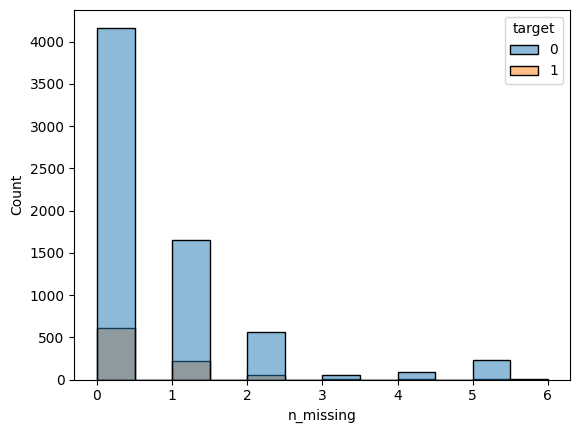

In [ ]:
df_preprocessing['n_missing'] = df_preprocessing.isnull().sum(axis=1)
sns.histplot(df_preprocessing, x='n_missing', binwidth=0.5, hue='target')

In [ ]:
missingness = df_preprocessing.isnull().sum().sum() / df_preprocessing.count().sum()
print('Overall Missingness of df_preprocessing is: {:.2f}%'.format(missingness * 100))

df_preprocessing.drop(df_preprocessing.index[df_preprocessing['n_missing'] > 2], inplace=True)


Overall Missingness of df_preprocessing is: 2.98%


In [ ]:
df_preprocessing.isnull().sum()

age                       0
sex                     211
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
psych                     0
TSH                     408
T3                     1910
TT4                       6
T4U                     295
FTI                     288
target                    0
n_missing                 0
dtype: int64

In [ ]:
df_preprocessing = df_preprocessing.drop('n_missing', axis=1)

In [ ]:
df_preprocessing.shape

(7275, 21)

#### knn돌리기 전 모두 수치형으로.
 f,t는 각각 0,1로, 성별은 원핫 인코딩

In [ ]:
binary_columns = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'psych']

In [ ]:
for column in binary_columns:
    df_preprocessing[column] = df_preprocessing[column].map({'f': 0, 't': 1})

In [ ]:
df_preprocessing = pd.get_dummies(df_preprocessing, columns=['sex'])

In [ ]:
df_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275 entries, 1 to 9171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7275 non-null   int64  
 1   on_thyroxine         7275 non-null   int64  
 2   query_on_thyroxine   7275 non-null   int64  
 3   on_antithyroid_meds  7275 non-null   int64  
 4   sick                 7275 non-null   int64  
 5   pregnant             7275 non-null   int64  
 6   thyroid_surgery      7275 non-null   int64  
 7   I131_treatment       7275 non-null   int64  
 8   query_hypothyroid    7275 non-null   int64  
 9   query_hyperthyroid   7275 non-null   int64  
 10  lithium              7275 non-null   int64  
 11  goitre               7275 non-null   int64  
 12  tumor                7275 non-null   int64  
 13  psych                7275 non-null   int64  
 14  TSH                  6867 non-null   float64
 15  T3                   5365 non-null   f

knn 전 transform 진행. 여기선 log화

In [ ]:
columns_to_log1p = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

for column in columns_to_log1p:
    df_preprocessing[column] = np.log1p(df_preprocessing[column])

#### knn으로 결측 채우기

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
# 원본 데이터프레임에 대한 표준편차 계산 함수
def calculate_std_difference(original_df, filled_df):
    return np.sum(np.abs(original_df.std() - filled_df.std()))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
k_values = [2, 4, 6, 8, 10]

# 각 K값에 대한 표준편차 차이 계산
std_differences = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k)
    filled_df = pd.DataFrame(imputer.fit_transform(df_preprocessing), columns=df_preprocessing.columns)
    std_diff = calculate_std_difference(df_preprocessing, filled_df)
    std_differences.append(std_diff)


# 가장 작은 차이의 K값 선택
best_k = k_values[np.argmin(std_differences)]
print(best_k)

2


In [ ]:
imputer = KNNImputer(n_neighbors=2)
knn2_df = pd.DataFrame(imputer.fit_transform(df_preprocessing), columns=df_preprocessing.columns)

In [ ]:
knn2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7275 entries, 0 to 7274
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7275 non-null   float64
 1   on_thyroxine         7275 non-null   float64
 2   query_on_thyroxine   7275 non-null   float64
 3   on_antithyroid_meds  7275 non-null   float64
 4   sick                 7275 non-null   float64
 5   pregnant             7275 non-null   float64
 6   thyroid_surgery      7275 non-null   float64
 7   I131_treatment       7275 non-null   float64
 8   query_hypothyroid    7275 non-null   float64
 9   query_hyperthyroid   7275 non-null   float64
 10  lithium              7275 non-null   float64
 11  goitre               7275 non-null   float64
 12  tumor                7275 non-null   float64
 13  psych                7275 non-null   float64
 14  TSH                  7275 non-null   float64
 15  T3                   7275 non-null   f

## 결측 채워진 df

In [ ]:
filled_df = knn2_df.copy()

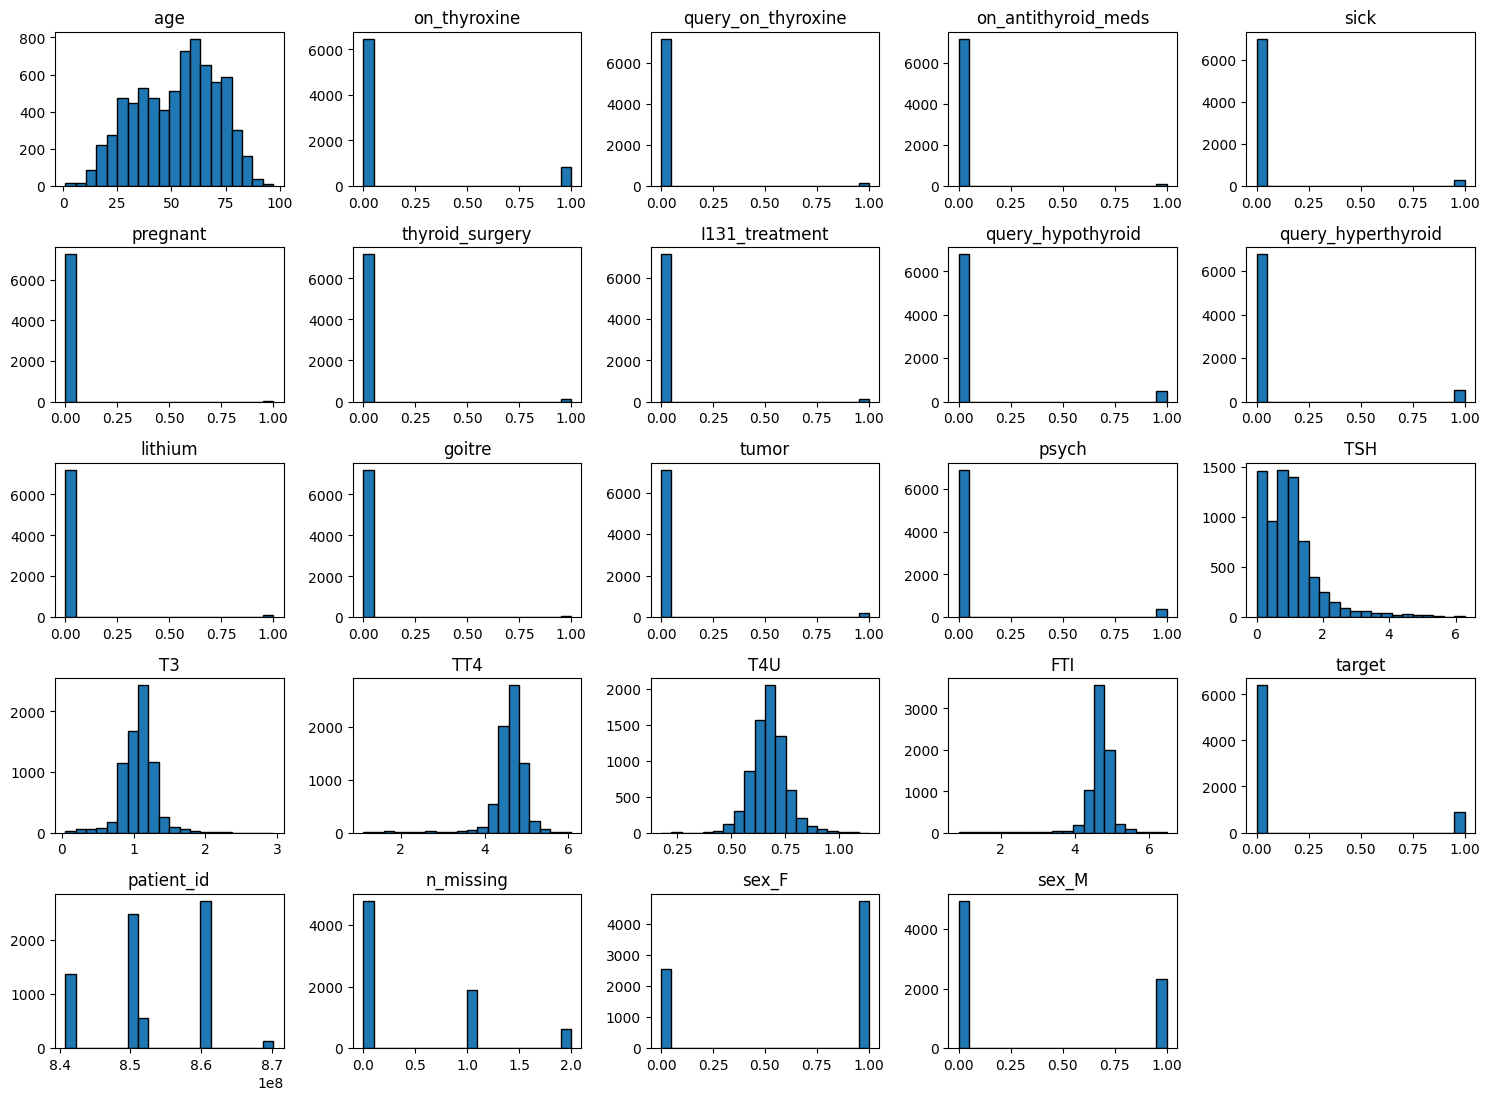

In [ ]:
# 히스토그램을 그릴 서브플롯 생성

plt.figure(figsize=(15, 15))
for i, column in enumerate(filled_df.columns, start=1):
    plt.subplot(7, 5, i)
    plt.hist(filled_df[column], bins=20, edgecolor='black')
    plt.title(column)
    plt.tight_layout()

plt.show()

In [ ]:
filled_df.to_csv(path+ '/log_k2.csv', index=False)

### 양의 skewness 갖는 TSH, T3, TT4, T4U, FTI 만 로그화 후 분포

In [ ]:
columns_to_log1p = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

for column in columns_to_log1p:
    filled_df[column] = np.log1p(filled_df[column])

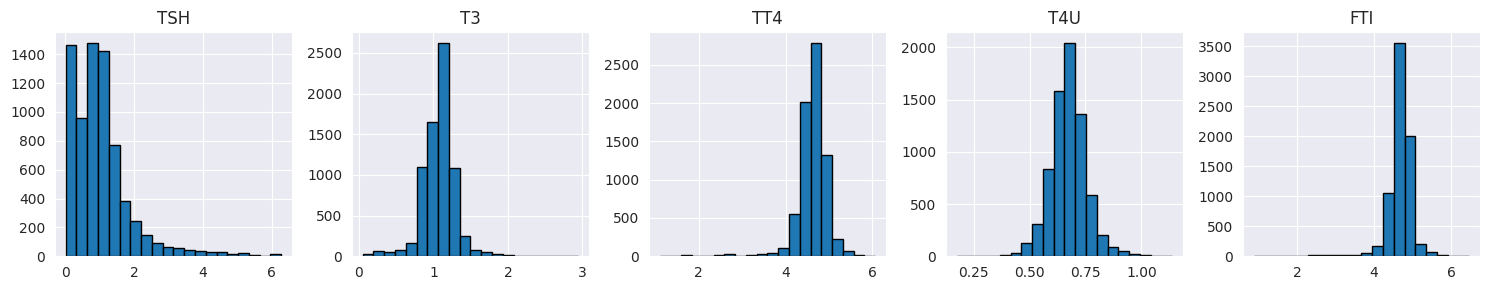

In [ ]:
# 아직도 왜도를 많이 띠긴함..
plt.figure(figsize=(15, 3))
for i, column in enumerate(columns_to_log1p, start=1):
    plt.subplot(1, 5, i)
    plt.hist(filled_df[column], bins=20, edgecolor='black')
    plt.title(column)
    plt.tight_layout()

plt.show()